# Implementing CNN using Keras on MNIST Dataset

In [87]:
import tensorflow as tf
import numpy as np

In [88]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [89]:
from tensorflow.keras.utils import to_categorical
x_train = np.reshape(x_train, (-1, 28, 28, 1))
# x_train = x_train.reshape(-1, 28, 28, 1)
x_test = np.reshape(x_test, (-1, 28, 28, 1))
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)
x_train.shape, y_train.shape, x_test.shape, y_test.shape


((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

In [90]:
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

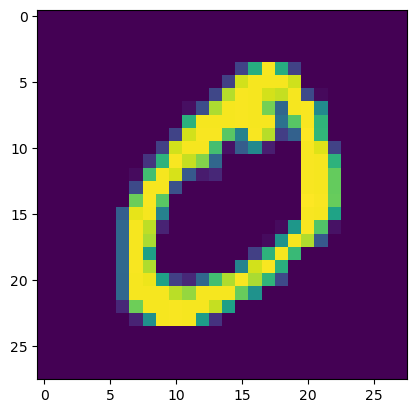

In [91]:
import matplotlib.pyplot as plt

plt.imshow(x_train[1])

In [92]:
from keras.models import Sequential
from keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dropout, Dense

#create model
model = Sequential()

#add model layers
model.add(Input(shape=(28,28,1)))

model.add(Conv2D(64, kernel_size=3, activation='relu')) #gives feature maps
model.add(MaxPooling2D(pool_size=2)) #reduces the dimensions of the image

model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax')) #this is basically ANN layer, fully-connected layer

In [93]:
model.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 26, 26, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 11, 11, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         8,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,114 (105.91 KB)

 Trainable params: 27,114 (105.91 KB)

 Non-trainable params: 0 (0.00 B)

In [94]:
#compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [95]:
from keras.callbacks import LearningRateScheduler
reduce_lr = LearningRateScheduler(lambda x: 1e-3 * 0.9 ** x)

In [96]:
#train the model
batch_size = 128
epochs = 15
history = model.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1, callbacks=[reduce_lr])

Epoch 1/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 20s 42ms/step - accuracy: 0.7631 - loss: 0.7782 - val_accuracy: 0.9753 - val_loss: 0.0856 - learning_rate: 0.0010
Epoch 2/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9655 - loss: 0.1142 - val_accuracy: 0.9817 - val_loss: 0.0641 - learning_rate: 9.0000e-04
Epoch 3/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 16s 38ms/step - accuracy: 0.9758 - loss: 0.0791 - val_accuracy: 0.9868 - val_loss: 0.0492 - learning_rate: 8.1000e-04
Epoch 4/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9803 - loss: 0.0633 - val_accuracy: 0.9878 - val_loss: 0.0457 - learning_rate: 7.2900e-04
Epoch 5/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 39ms/step - accuracy: 0.9825 - loss: 0.0582 - val_accuracy: 0.9888 - val_loss: 0.0431 - learning_rate: 6.5610e-04
Epoch 6/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - accuracy: 0.9828 - loss: 0.0559 - val_accuracy: 0.9880 - val_loss: 0.0419 - learning_rate: 5.9049e-04
Epoch 7/15
422/422 ━━━━━━━━━━━━━━━━━━━━ 17s 40ms/step - 

In [97]:
#evaluation
score = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss: ', score[0])
print('Test accuracy: ', score[1])

Test Loss:  0.02655337005853653
Test accuracy:  0.9905999898910522


In [98]:
model.evaluate(x_train, y_train, verbose=0)
print('Train losss: ', score[0])
print('Train score: ', score[1])

Train losss:  0.02655337005853653
Train score:  0.9905999898910522


In [99]:
#make predictions
predictions = model.predict(x_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


In [100]:
predicted_classes = np.argmax(predictions, axis=1)
true_classes = np.argmax(y_test, axis=1)

In [101]:
# Print some predictions
print("Sample predictions:", predicted_classes[:10])
print("True labels:", true_classes[:10])

Sample predictions: [7 2 1 0 4 1 4 9 5 9]
True labels: [7 2 1 0 4 1 4 9 5 9]


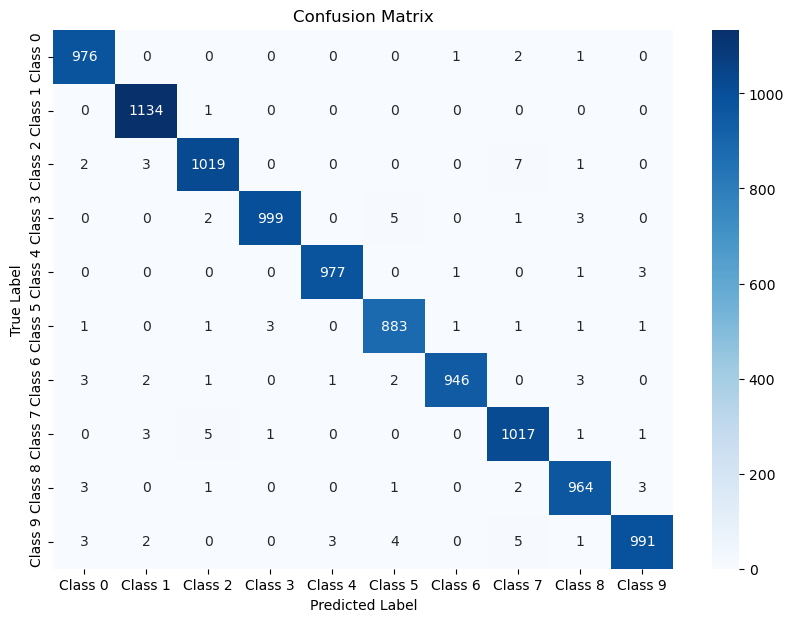

In [102]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(10, 7))
sns.heatmap(cm, 
            annot=True,         # Display numbers inside cells
            fmt='d',            # Format numbers as integers
            cmap='Blues',       # Color map for the heat map
            xticklabels=[f'Class {i}' for i in range(10)],  # X-axis labels
            yticklabels=[f'Class {i}' for i in range(10)])  # Y-axis labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()